In [1]:
from itertools import product

import seaborn as sns
from tqdm import tqdm

from api.instance import Instance
from strategies.local_search.local_search import LocalSearch
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['solution', 'cost', 'time'], dtype="float")
for i in range(10):
    for instance_name in ['kroA100']: #, 'kroB100', 'kroA200', 'kroB200']:
        instance = Instance(name=instance_name)
        solve_strategy: LocalSearch = LocalSearch(
            instance=instance,
            version="greedy",
            neighbourhood="edge",
        )
        solve_strategy.run(run_times=1)

        costs = list(map(lambda x: x[1], solve_strategy.solutions))

        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[s, cost, time]],columns=['solution', 'cost', 'time'], dtype="float"))
        print(" ")
        print(df)
        # draw_solution(
        #     instance=instance,
        #     solution=solve_strategy.solution,
        #     title=f'Local search {version}, {instance.name}, distance: {solve_strategy.solution_cost}, {neighbourhood}',
        #     save_file_name=f'{instance.name}_{min(costs)}_{version}_{neighbourhood}.png'
        # )



 
                                            solution     cost      time
0  [4, 36, 32, 12, 81, 1, 53, 39, 63, 68, 80, 24,...  12843.0  0.715787
 
                                            solution     cost      time
0  [4, 36, 32, 12, 81, 1, 53, 39, 63, 68, 80, 24,...  12843.0  0.715787
0  [55, 41, 63, 43, 49, 67, 84, 38, 12, 32, 36, 4...  14322.0  0.808982
 
                                            solution     cost      time
0  [4, 36, 32, 12, 81, 1, 53, 39, 63, 68, 80, 24,...  12843.0  0.715787
0  [55, 41, 63, 43, 49, 67, 84, 38, 12, 32, 36, 4...  14322.0  0.808982
0  [28, 2, 13, 70, 40, 99, 4, 36, 32, 12, 81, 1, ...  14181.0  0.620003
 
                                            solution     cost      time
0  [4, 36, 32, 12, 81, 1, 53, 39, 63, 68, 80, 24,...  12843.0  0.715787
0  [55, 41, 63, 43, 49, 67, 84, 38, 12, 32, 36, 4...  14322.0  0.808982
0  [28, 2, 13, 70, 40, 99, 4, 36, 32, 12, 81, 1, ...  14181.0  0.620003
0  [92, 27, 66, 63, 39, 53, 1, 43, 81, 94, 12, 38...  13

In [2]:
def solution_similarity_vertex(s1, s2):
    sim = 0
    for s in range(len(s1)):
        if s1[s] in s2:
            sim += 1
    return sim/len(s1)

def solution_similarity_edge(s1, s2):
    sim = 0
    edges_s1, edges_s2 = [], []
    for s in range(len(s1)-1):
        edges_s1.append((s1[s], s1[s+1]))
        edges_s2.append((s2[s], s2[s+1]))
    for s in edges_s1:
        if s in edges_s2 or s[::-1] in edges_s2:
            sim += 1
    return sim/(len(s1)-1)

In [3]:
best_solution = df['solution'].iloc[df['cost'].idxmin(axis=0)]


In [4]:
results_vertex = []
results_edge = []

for sol in df.iterrows():
    results_vertex.append([sol[1]['cost'], solution_similarity_vertex(sol[1]['solution'], best_solution)])
    results_edge.append([sol[1]['cost'], solution_similarity_edge(sol[1]['solution'], best_solution)])
    
results_edge

[[12843.0, 1.0],
 [14322.0, 0.38],
 [14181.0, 0.32],
 [13860.0, 0.24],
 [13055.0, 0.42],
 [12277.0, 0.32],
 [13251.0, 0.32],
 [13845.0, 0.26],
 [11485.0, 0.34],
 [12660.0, 0.44]]

In [5]:
import numpy as np

np_edge = np.asarray(results_edge)
np_edge = np_edge[np.argsort(np_edge[:, 0])]
np_vertex = np.asarray(results_vertex)
np_vertex = np_vertex[np.argsort(np_vertex[:, 0])]

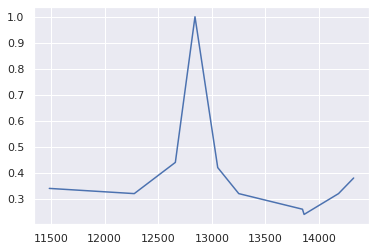

In [6]:
import matplotlib.pyplot as plt

plt.plot(np_edge[:, 0], np_edge[:, 1])

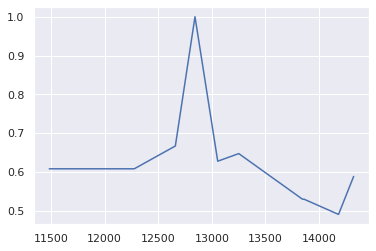

In [7]:
plt.plot(np_vertex[:, 0], np_vertex[:, 1])

In [8]:
results_vertex_all = []
results_edge_all = []

for sol in df.iterrows():
    partial_vertex, partial_edge = 0, 0
    for s in df.iterrows():
        partial_vertex += solution_similarity_vertex(sol[1]['solution'], best_solution)
        partial_edge += solution_similarity_edge(sol[1]['solution'], best_solution)
    partial_edge /= len(df)
    partial_vertex /= (len(df)-1)
    results_vertex_all.append([sol[1]['cost'], partial_vertex])
    results_edge_all.append([sol[1]['cost'], partial_edge])
    
results_edge_all

[[12843.0, 1.0],
 [14322.0, 0.37999999999999995],
 [14181.0, 0.31999999999999995],
 [13860.0, 0.24000000000000005],
 [13055.0, 0.42000000000000004],
 [12277.0, 0.31999999999999995],
 [13251.0, 0.31999999999999995],
 [13845.0, 0.25999999999999995],
 [11485.0, 0.33999999999999997],
 [12660.0, 0.44000000000000006]]

In [9]:
np_edge_all = np.asarray(results_edge_all)
np_edge_all = np_edge_all[np.argsort(np_edge_all[:, 0])]
np_vertex_all = np.asarray(results_vertex_all)
np_vertex_all = np_vertex_all[np.argsort(np_vertex_all[:, 0])]

In [10]:
np_vertex_all

array([[1.14850000e+04, 6.75381264e-01],
       [1.22770000e+04, 6.75381264e-01],
       [1.26600000e+04, 7.40740741e-01],
       [1.28430000e+04, 1.11111111e+00],
       [1.30550000e+04, 6.97167756e-01],
       [1.32510000e+04, 7.18954248e-01],
       [1.38450000e+04, 5.88235294e-01],
       [1.38600000e+04, 5.88235294e-01],
       [1.41810000e+04, 5.44662309e-01],
       [1.43220000e+04, 6.53594771e-01]])